Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$
$\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\newcommand{\matt}[1]{\begin{matrix} #1 \end{matrix}}$



# Exercício 1: Introdução e Regressão Linear

Este é um exercício de introdução ao Python e bibliotecas básicas.

# Preparação / Revisão

- Ler Watt _(Machine Learning Refined)_ cap. 1
- Ler Watt apêndices A, B (de B.3 apenas os exemplos B.1.a e B.2.a) e D
- Ler e praticar os tutoriais:
 - Python (se necessário): https://docs.python.org/3/tutorial
 - NumPy: https://numpy.org/doc/stable/user/quickstart.html
 - Matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html
 - Pandas (opcional): https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
- Revisar (caso necessário) conceitos básicos de probabilidade e estatística: variáveis aleatórias, distribuição/densidade de probabilidade, histograma, média, variância, correlação

In [ ]:
# Inicie importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Manipulando arrays

1. Escreva uma função do Python que implementa a [similaridade do cosseno](https://en.wikipedia.org/wiki/Cosine_similarity) (eq. A.7 do Watt) entre dois vetores, definida por

$$
{\rm cosine\_similarity(\bx,\by)} = \frac{\bx^T \by}{\|\bx\|\|\by\|}
$$

In [ ]:
import numpy as np
from numpy.linalg import norm
def cosine_similarity(x,y,z):
  
  x = np.array([1,2,3,4])
  y = np.array([2,2,2,2])
  z = np.array([2,-2,2,-2])
  s = np.dot(x.T,y)/(norm(x) * norm(y))
  return s
  print(cosine_similarity(x,y)) # = 0.9128709291752769
  print(cosine_similarity(x,z)) # = -0.18257418583505536
  
    


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

0.9128709291752769

### Dicas

- Use o operator @ (ver [documentação](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)) ao invés de `.dot()` para implementar  multiplicação matriz-matriz ou matriz-vetor, por exemplo: `C = A @ B`
- Funções úteis:

```python
np.linalg.norm()
```

2. Calcule os produtos $\bA^T\bB$ e $\bB \bA^T$, onde
$$\bA = \mat{1 & 2 \\ 3 & 4 \\ 5 & 6} \qquad \bB = \mat{1 & 1 \\ 1 & 1 \\ 1 & 1}$$

In [ ]:
import numpy as np

np.a=([1])

In [ ]:
def steff():
  print("--"*30)
  

import numpy as np
a=np.array([[1,2],
           [3,4],
           [5,6]])
steff()
b=np.array([[1,1],
           [1,1], 
           [1,1]])
print(a)
steff()
print(b)
steff()
c= a.T @ b
print (c)
steff()
z= b @ a.T
print (z)


------------------------------------------------------------
[[1 2]
 [3 4]
 [5 6]]
------------------------------------------------------------
[[1 1]
 [1 1]
 [1 1]]
------------------------------------------------------------
[[ 9  9]
 [12 12]]
------------------------------------------------------------
[[ 3  7 11]
 [ 3  7 11]
 [ 3  7 11]]


3. Considere os vetores abaixo.

In [ ]:
import numpy as np

A = np.array([[1,0,1],[0,1,0],[1,1,1]])
A

array([[1, 0, 1],
       [0, 1, 0],
       [1, 1, 1]])

In [ ]:
b = np.array([1,2,3])
b

array([1, 2, 3])

Explique o porquê do resultado abaixo.

In [ ]:
np.all(b*A == A*b)

True

# 2. Manipulando dados

1. Baixe o arquivo `bitcoin_price.csv` (**terceiro** arquivo da lista em *Data Sources*) disponível em

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/

e salve-o numa subpasta `data`, i.e., o arquivo estará acessível em `data/bitcoin_price.csv`

2. Carregue o arquivo usando a biblioteca Pandas
3. Trace o gráfico do preço de fechamento ("Close") em função da data para todo o ano de 2017 (365 amostras):
 - usando a função `.plot()` do Pandas
 - convertendo para NumPy e usando Matplotlib

### Dicas

- Siga o exemplo de uso do Pandas em https://github.com/dsevero/dsevero/blob/master/content/posts/pandas/tutorial.ipynb

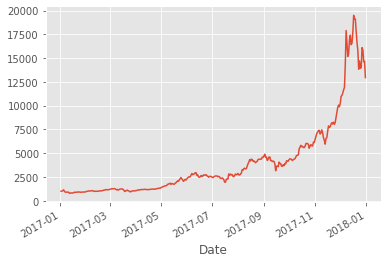

In [ ]:
from pandas._libs.tslibs import timestamps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
arquivo = pd.read_csv('/content/d\/coin_Bitcoin.csv')
arquivo.head()
arquivo['Date'] = pd.to_datetime(arquivo['Date'])
df = arquivo.set_index('Date')['Close']
df['2017-01-01  00:00:00':'2017-12-30  23:59:59'].plot()


# 3. Análise de dados

Agora, veremos um exemplo de análise de dados usando um conjunto de dados do livro do James _(An Introduction to Statistical Learning)_.

Carregue os dados usando o comando abaixo. Lembre que a variável-alvo (rótulo, variável de saída) é a coluna `sales`.

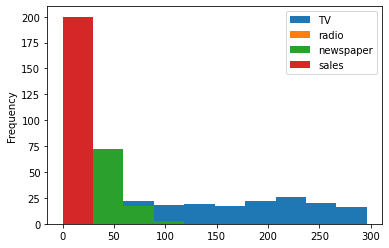

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
df = pd.read_csv('http://www.statlearning.com/s/Advertising.csv', index_col=0)
df.head()
df.plot.hist()


1. Trace o histograma de cada variável (coluna), i.e., 4 no total. Para isso, utilize a função `plt.hist()`, com parâmetro `bins=30`.
1. Calcule a matriz de correlação entre as colunas. Dica: utilize a função `pd.DataFrame.corr()`
1. Para cada atributo (variável de entrada), trace o gráfico do valor-alvo em função do atributo. Utilize um *scatter plot*, i.e., trace apenas os marcadores, não linhas.
1. O que você já pode afirmar sobre os dados a partir dessa análise exploratória?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


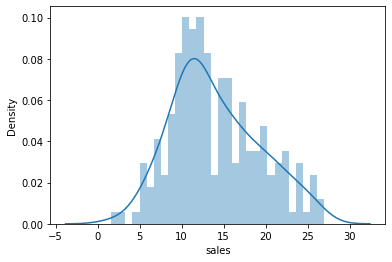

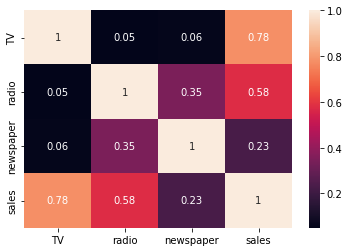

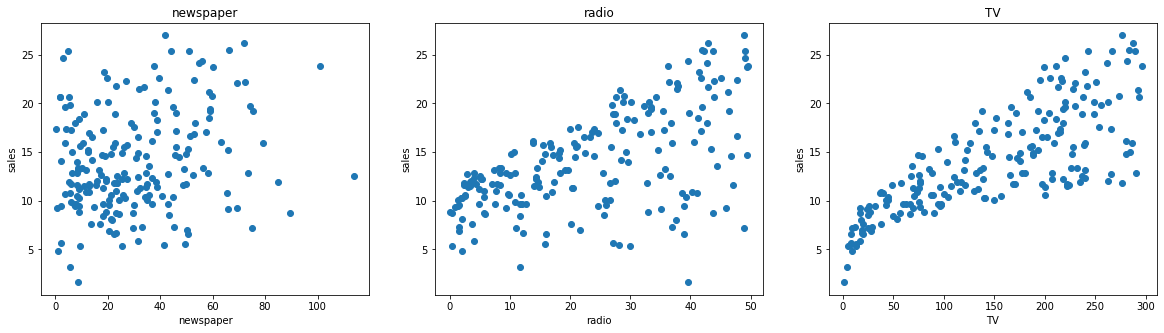

In [ ]:
from locale import D_FMT
from typing import DefaultDict
df['sales']
df.isnull().sum()
sns.distplot(df['sales'], bins=30)
plt.show()
pd.DataFrame.corr(df)
df_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=df_matrix, annot=True)
plt.figure(figsize=(20, 5))

features = ['newspaper', 'radio', 'TV']
target = df['sales']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('sales')

5. Extraia a matriz de projeto $\bX$ e vetor de rótulos $\by$. Dica: utilize a função do pandas `.to_numpy()`
1. Separe o conjunto de dados aleatoriamente em conjuntos de treinamento e teste, nas proporções 80% e 20%, respectivamente. Para isso, utilize a função `train_test_split()` da biblioteca scikit-learn.

In [ ]:


X = pd.DataFrame(np.c_[df['newspaper'], df['radio'], df['TV']], columns = ['newspaper','radio', 'TV'])
Y = df['sales']

print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


7. Treine um modelo de regressão linear sobre o **conjunto de treinamento**. Para isso, utilize a função `sklearn.linear_model.LinearRegression()` da biblioteca sklearn. 
1. Calcule a raiz do erro quadrático médio (RMSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste. Para isso, utilize a função `sklearn.metrics.mean_squared_error()` do sklearn.
1. (OPCIONAL) Encontre alguma forma de visualizar o modelo treinado ou suas predições.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = (y_train, y_train_predict)

'''print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = (y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))'''

model = LinearRegression()
model.fit(X_train, y_train)
print('Train RMSE: {}'.format(X_train,y_train))
print('Test RMSE: {}'.format(X_test,y_train))

Train RMSE:      newspaper  radio     TV
159       34.6   18.4  131.7
62        27.3   15.5  239.3
166       21.6   37.6   17.9
45        31.5   22.5  175.1
23        26.2   16.9  228.3
..         ...    ...    ...
73        31.3    5.7  129.4
144       38.9   14.8   96.2
118       79.2   36.9  125.7
189       23.4   12.1   18.7
99        45.9   41.7  135.2

[160 rows x 3 columns]
Test RMSE:      newspaper  radio     TV
119       22.3   16.0   19.4
77        14.2   28.5  120.5
148       11.9   40.3   38.0
149       20.6   25.8   44.7
154        9.5   21.1  187.8
151       48.7    8.4  121.0
122       15.6    2.4  224.0
6         23.5   32.8   57.5
28        22.9   27.1  248.8
71        31.7   14.3  109.8
188        3.7   13.9  286.0
34         7.4    1.4   95.7
21        23.5    5.1  237.4
40        31.6   22.3  202.5
55        60.0   49.4  198.9
104        5.3   34.3  238.2
3         58.5   41.3  151.5
39        32.0   37.7  228.0
117       14.8    0.8   76.4
134       65.6   38.6   3

### Dicas

- Funções úteis
```python
pd.hist()
pd.DataFrame.corr()
pd.DataFrame.to_numpy()
sklearn.model_selection.train_test_split()
sklearn.linear_model.LinearRegression()
sklearn.metrics.mean_squared_error()
np.sqrt()
```
- Caso deseje uma referência, consulte o tutorial disponível em:
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155. Note, porém, que não é necessário usar as funções da biblioteca `seaborn`.